In [19]:
import newAlgo as na
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Competiton as cp

In [25]:
def plot_results(analysis_results):
    """Create comprehensive visualizations of the analysis results."""
    # 1. Overall Performance (Wins)
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    bars = plt.bar(analysis_results['wins'].keys(), analysis_results['wins'].values())
    plt.xlabel("Strategy")
    plt.ylabel("Wins")
    plt.title("Strategy Performance (Total Wins)")
    plt.xticks(rotation=45, ha="right")
    
    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    # 2. Average Scores
    plt.subplot(122)
    bars = plt.bar(analysis_results['average_scores'].keys(), 
                   analysis_results['average_scores'].values())
    plt.xlabel("Strategy")
    plt.ylabel("Average Score")
    plt.title("Average Scores per Strategy")
    plt.xticks(rotation=45, ha="right")
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Win/Draw/Loss Matrix
    plt.figure(figsize=(10, 8))
    result_matrix = np.zeros_like(analysis_results['payoff_matrix'])
    
    # Create matrix with: 1 for win, 0 for draw, -1 for loss
    for i in range(len(analysis_results['strategy_names'])):
        for j in range(len(analysis_results['strategy_names'])):
            if i != j:
                strategy_score = analysis_results['payoff_matrix'][i, j]
                opponent_score = analysis_results['opponent_payoff_matrix'][i, j]
                if abs(strategy_score - opponent_score) < 0.01:  # Small threshold for floating-point comparison
                    result_matrix[i, j] = 0  # Draw
                elif strategy_score > opponent_score:
                    result_matrix[i, j] = 1  # Win
                else:
                    result_matrix[i, j] = -1  # Loss

    # Custom colormap: red for loss, yellow for draw, green for win
    colors = ['red', 'yellow', 'green']
    n_bins = 3  # 3 possible outcomes
    custom_cmap = plt.cm.RdYlGn
    
    plt.imshow(result_matrix, cmap=custom_cmap, vmin=-1, vmax=1)
    plt.colorbar(label='Outcome', ticks=[-1, 0, 1], 
                format=plt.FuncFormatter(lambda x, _: {-1: 'Loss', 0: 'Draw', 1: 'Win'}[x]))
    
    # Add text annotations
    for i in range(len(analysis_results['strategy_names'])):
        for j in range(len(analysis_results['strategy_names'])):
            if i != j:
                result = result_matrix[i, j]
                text = 'Draw' if result == 0 else ('Win' if result == 1 else 'Loss')
                color = 'black' if result == 0 else ('white' if result == -1 else 'black')
                plt.text(j, i, text, ha="center", va="center", color=color)
    
    plt.xticks(range(len(analysis_results['strategy_names'])), 
               analysis_results['strategy_names'], rotation=45, ha="right")
    plt.yticks(range(len(analysis_results['strategy_names'])), 
               analysis_results['strategy_names'])
    plt.title("Head-to-Head Outcomes (including Draws)")
    plt.xlabel("Opponent Strategy")
    plt.ylabel("Strategy")
    plt.tight_layout()
    plt.show()
    
    # Rest of the plots (4, 5) remain the same

    # Update the results dictionary to include draws
    strategy_results = {name: {'wins': 0, 'draws': 0, 'losses': 0} 
                       for name in analysis_results['strategy_names']}
    
    for i, strategy in enumerate(analysis_results['strategy_names']):
        for j, opponent in enumerate(analysis_results['strategy_names']):
            if i != j:
                if result_matrix[i, j] == 1:
                    strategy_results[strategy]['wins'] += 1
                elif result_matrix[i, j] == 0:
                    strategy_results[strategy]['draws'] += 1
                else:
                    strategy_results[strategy]['losses'] += 1
    
    # Print detailed summary statistics including draws
    print("\nStrategy Summary:")
    print("-" * 50)
    for strategy in analysis_results['strategy_names']:
        total_games = len(analysis_results['strategy_names']) - 1  # excluding self-play
        results = strategy_results[strategy]
        print(f"\n{strategy}:")
        print(f"Wins: {results['wins']} ({results['wins']/total_games:.1%})")
        print(f"Draws: {results['draws']} ({results['draws']/total_games:.1%})")
        print(f"Losses: {results['losses']} ({results['losses']/total_games:.1%})")
        print(f"Average Score: {analysis_results['average_scores'][strategy]:.2f}")
        print(f"Cooperation Rate: {analysis_results['cooperation_rates'][strategy]:.2%}")
    
    # 4. Cooperation Rates
    plt.figure(figsize=(10, 6))
    bars = plt.bar(analysis_results['cooperation_rates'].keys(), 
                   analysis_results['cooperation_rates'].values())
    plt.xlabel("Strategy")
    plt.ylabel("Cooperation Rate")
    plt.title("Average Cooperation Rate by Strategy")
    plt.xticks(rotation=45, ha="right")
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

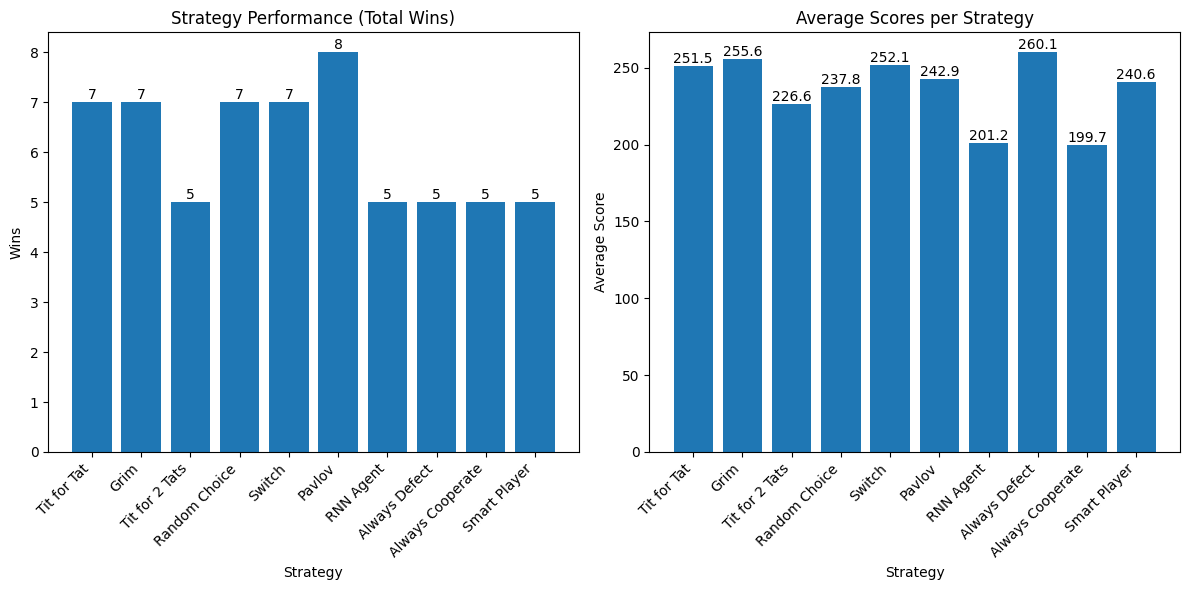

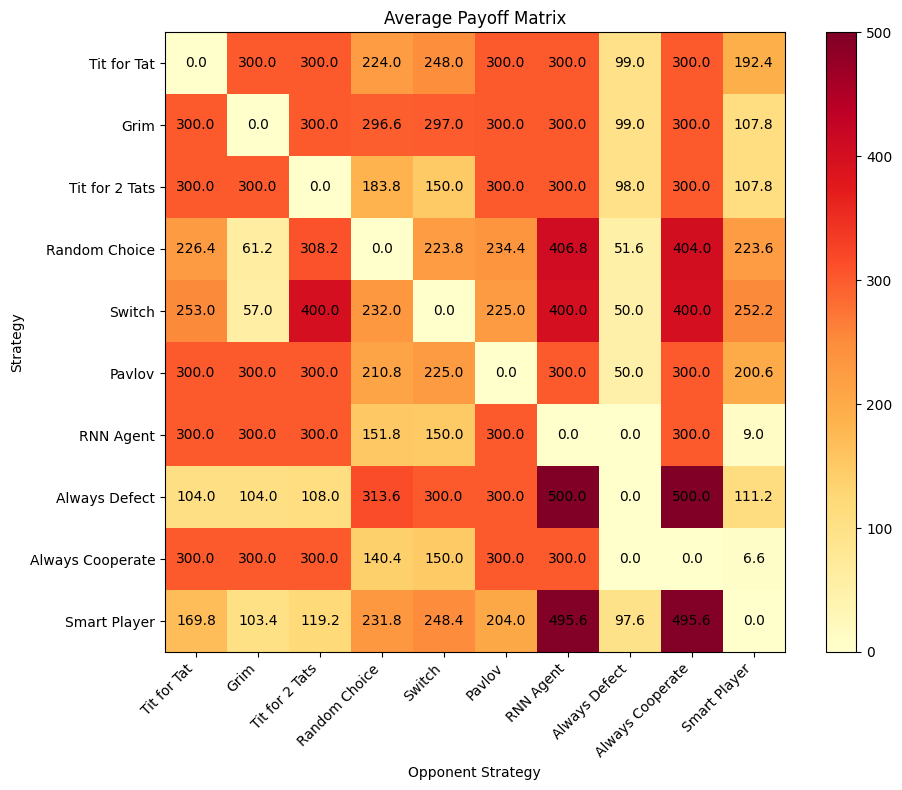

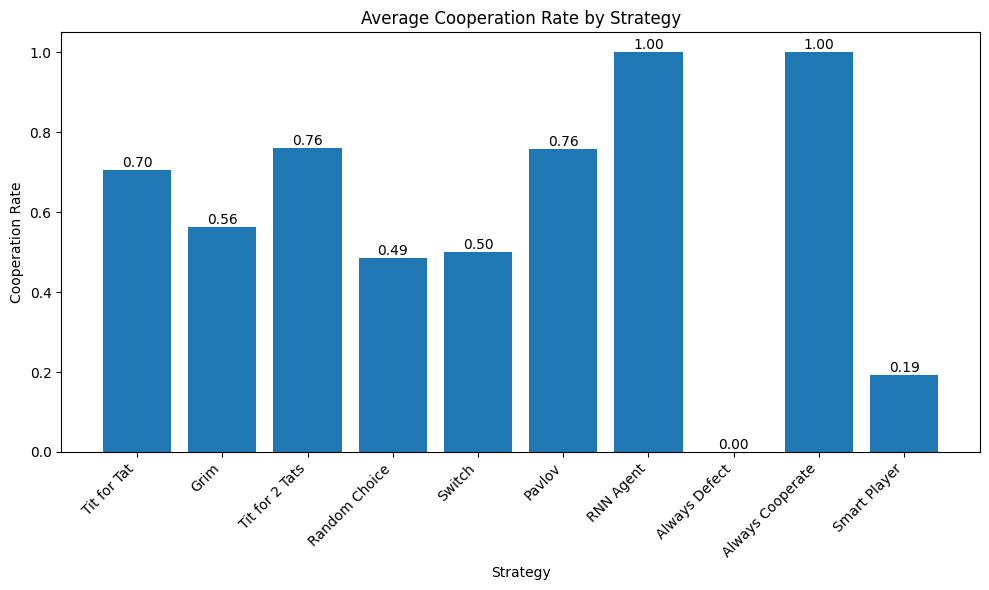


Strategy Summary:
--------------------------------------------------

Tit for Tat:
Total Wins: 7
Average Score: 251.49
Cooperation Rate: 70.49%

Grim:
Total Wins: 7
Average Score: 255.60
Cooperation Rate: 56.29%

Tit for 2 Tats:
Total Wins: 5
Average Score: 226.62
Cooperation Rate: 76.13%

Random Choice:
Total Wins: 7
Average Score: 237.78
Cooperation Rate: 48.62%

Switch:
Total Wins: 7
Average Score: 252.13
Cooperation Rate: 50.00%

Pavlov:
Total Wins: 8
Average Score: 242.93
Cooperation Rate: 75.91%

RNN Agent:
Total Wins: 5
Average Score: 201.20
Cooperation Rate: 100.00%

Always Defect:
Total Wins: 5
Average Score: 260.09
Cooperation Rate: 0.00%

Always Cooperate:
Total Wins: 5
Average Score: 199.67
Cooperation Rate: 100.00%

Smart Player:
Total Wins: 5
Average Score: 240.60
Cooperation Rate: 19.29%


In [26]:
if __name__ == "__main__":
    # Run analysis
    analysis_results = cp.analyze_strategies(trials=100, games_per_matchup=5)
    
    # Generate visualizations
    plot_results(analysis_results)
    
    # Print summary statistics
    print("\nStrategy Summary:")
    print("-" * 50)
    for strategy in analysis_results['strategy_names']:
        print(f"\n{strategy}:")
        print(f"Total Wins: {analysis_results['wins'][strategy]}")
        print(f"Average Score: {analysis_results['average_scores'][strategy]:.2f}")
        print(f"Cooperation Rate: {analysis_results['cooperation_rates'][strategy]:.2%}")